In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
# Define the tickers and fetch data from Yahoo Finance
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META']
start_date = '2020-01-01'
end_date = '2023-12-31'  # Example end date

# Fetch data
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

[*********************100%%**********************]  5 of 5 completed


In [3]:
# Calculate daily returns
returns = data.pct_change().dropna()

In [4]:
# Calculate expected returns and covariance
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Function to calculate portfolio performance
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns * weights) * 252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

# Optimization function
def minimize_volatility(weights, mean_returns, cov_matrix):
    return portfolio_performance(weights, mean_returns, cov_matrix)[0]

# Constraints and bounds
num_assets = len(tickers)
args = (mean_returns, cov_matrix)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for asset in range(num_assets))

# Optimize
optimal = minimize(minimize_volatility, num_assets * [1. / num_assets,], args=args,
                   method='SLSQP', bounds=bounds, constraints=constraints)

# Optimal weights
optimal_weights = optimal.x

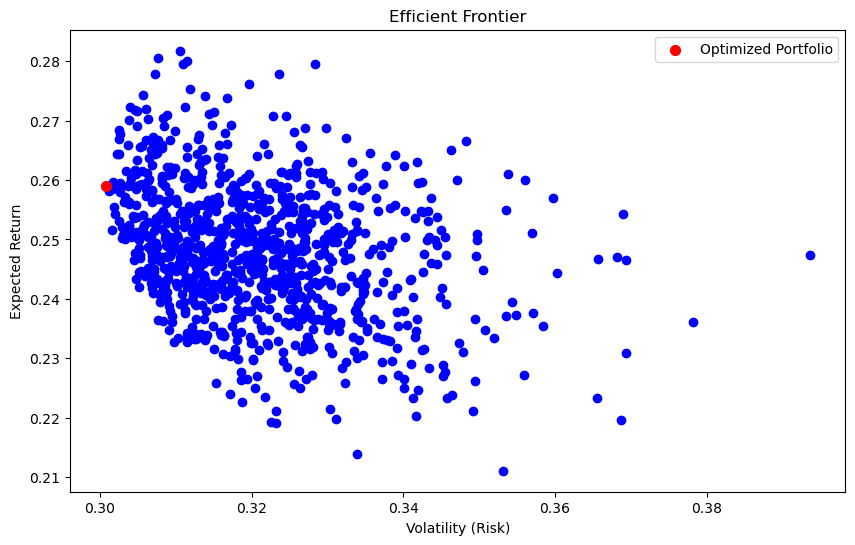

In [5]:
# Plot the efficient frontier
fig, ax = plt.subplots(figsize=(10, 6))
# Simulate portfolios (This is a placeholder for the actual efficient frontier plotting)
for _ in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    risk, return_ = portfolio_performance(weights, mean_returns, cov_matrix)
    ax.scatter(risk, return_, c='blue')

# Highlight the optimized portfolio
risk_optimal, return_optimal = portfolio_performance(optimal_weights, mean_returns, cov_matrix)
ax.scatter(risk_optimal, return_optimal, color='red', s=50, label='Optimized Portfolio')
ax.legend()

plt.title('Efficient Frontier')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.show()